# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [5]:
# Import essential libraries for data manipulation and analysis

# Importing essential libraries for data manipulation, analysis, and machine learning
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For advanced data visualization

# Machine learning libraries
from sklearn.model_selection import train_test_split    # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For feature scaling and encoding categorical features
from sklearn.compose import ColumnTransformer             # To apply transformations to specific columns
from sklearn.pipeline import Pipeline                     # For creating a machine learning pipeline
from sklearn.linear_model import LinearRegression         # For Linear Regression model
from sklearn.ensemble import RandomForestRegressor        # For Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # For model evaluation

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [6]:
# Importing the file porter_data_1.csv
# Load the CSV file into a pandas DataFrame
file_path = 'porter_data_1.csv'  # Specify the file path to the CSV file
data = pd.read_csv(file_path)    # Load the data into a pandas DataFrame

# Display the first few rows of the dataset to get an overview
print(data.head())


   market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                     4.0             1.0          4.0    3441.0   
1                    46.0             2.0          1.0    1900.0   
2                    36.0             3.0          4.0    4771.0   
3                    38.0             1.0          1.0    1525.0   
4                    38.0             1.0          2.0    3620.0   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                 4.0           557.0          1239.0                   33.0   
1                 1.0          1400.0          1400.0                    1.0   
2 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11774 entries, 0 to 11773
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   market_id                 11774 non-null  float64
 1   created_at                11774 non-null  object 
 2   actual_delivery_time      11774 non-null  object 
 3   store_primary_category    11773 non-null  float64
 4   order_protocol            11773 non-null  float64
 5   total_items               11773 non-null  float64
 6   subtotal                  11773 non-null  float64
 7   num_distinct_items        11773 non-null  float64
 8   min_item_price            11773 non-null  float64
 9   max_item_price            11773 non-null  float64
 10  total_onshift_dashers     11773 non-null  float64
 11  total_busy_dashers        11773 non-null  float64
 12  total_outstanding_orders  11773 non-null  float64
 13  distance                  11773 non-null  float64
dtypes: flo

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [11]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
# Re-convert with error handling to coerce invalid formats to NaT
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'], errors='coerce')
data.head()


market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                     4.0   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                    46.0   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                    36.0   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                    38.0   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                    38.0   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0          4.0    3441.0                 4.0           557.0   
1             2.0          1.0    1900.0                 1.0          1400.0   
2             3.0          4.0    4771.0                 3.0           820.0   
3             1.0          1.0    1525.0                 1.0          1525.0   
4             1.0          2.0    3620.0                 2.0          1425.0   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0          1239.0                   33.0                14.0   
1          1400.0                    1.0                 2.0   
2          1604.0                    8.0                 6.0   
3          1525.0                    5.0                 6.0   
4          2195.0                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [13]:
# Convert categorical features to category type
# Convert relevant columns to 'category' dtype
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']
data[categorical_columns] = data[categorical_columns].astype('category')

# Confirm the conversion
data.dtypes[categorical_columns]



market_id                 category
store_primary_category    category
order_protocol            category
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [15]:
# Calculate time taken in minutes
data['time_taken'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 60
data.head()




market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                    4.0   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                   46.0   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                   36.0   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                   38.0   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                   38.0   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0          4.0    3441.0                 4.0           557.0   
1            2.0          1.0    1900.0                 1.0          1400.0   
2            3.0          4.0    4771.0                 3.0           820.0   
3            1.0          1.0    1525.0                 1.0          1525.0   
4            1.0          2.0    3620.0                 2.0          1425.0   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0          1239.0                   33.0                14.0   
1          1400.0                    1.0                 2.0   
2          1604.0                    8.0                 6.0   
3          1525.0                    5.0                 6.0   
4          2195.0                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [17]:
# Extract the hour and day of week from the 'created_at' timestamp
data['created_hour'] = data['created_at'].dt.hour
data['created_dayofweek'] = data['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
data['isWeekend'] = data['created_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
data.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                    4.0   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                   46.0   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                   36.0   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                   38.0   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                   38.0   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0          4.0    3441.0                 4.0           557.0   
1            2.0          1.0    1900.0                 1.0          1400.0   
2            3.0          4.0    4771.0                 3.0           820.0   
3            1.0          1.0    1525.0                 1.0          1525.0   
4            1.0          2.0    3620.0                 2.0          1425.0   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0          1239.0                   33.0                14.0   
1          1400.0                    1.0                 2.0   
2          1604.0                    8.0                 6.0   
3          1525.0                    5.0                 6.0   
4          2195.0                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  created_hour  \
0                      21.0     34.44        47.0            22   
1                       2.0     27.60        44.0            21   
2                      18.0     11.56        55.0             0   
3                       8.0     31.80        59.0             3   
4                       7.0      8.20        46.0             2   

   created_dayofweek  isWeekend  
0                  4          0  
1                  1          0  
2                  0          0  
3                  3          0  
4                  1          0

In [ ]:
# Drop unnecessary columns


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [19]:
# Define target variable (y) and features (X)

y = data['time_taken']

# Select features for modeling (excluding target and timestamp columns)
X = data[[
    'market_id', 'store_primary_category', 'order_protocol', 'total_items',
    'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'distance', 'created_hour', 'created_dayofweek', 'isWeekend'
]]

# Show the shapes of X and y
X.shape, y.shape


((11774, 15), (11774,))

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [21]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Show shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9419, 15), (2355, 15), (9419,), (2355,))

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [23]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_cols, categorical_cols


(['total_items',
  'subtotal',
  'num_distinct_items',
  'min_item_price',
  'max_item_price',
  'total_onshift_dashers',
  'total_busy_dashers',
  'total_outstanding_orders',
  'distance',
  'isWeekend'],
 ['market_id', 'store_primary_category', 'order_protocol'])

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [25]:
# Plot distributions for all numerical columns
# Set up a grid for subplots
num_cols = len(numerical_cols)
n_rows = (num_cols +2) // 3
plt.figure(figsize=(18, 5 * n_rows))

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, 3, i + 1)
    plt.hist(X[col], bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [27]:
# Distribution of categorical columns
cat_cols = len(categorical_cols)
n_rows = (cat_cols +2) // 3
plt.figure(figsize=(18, 5 * n_rows))

# Plot each numerical column
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, 3, i + 1)
    plt.hist(X[col], bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [31]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
plt.hist(data['time_taken'], bins=40, edgecolor='k')
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

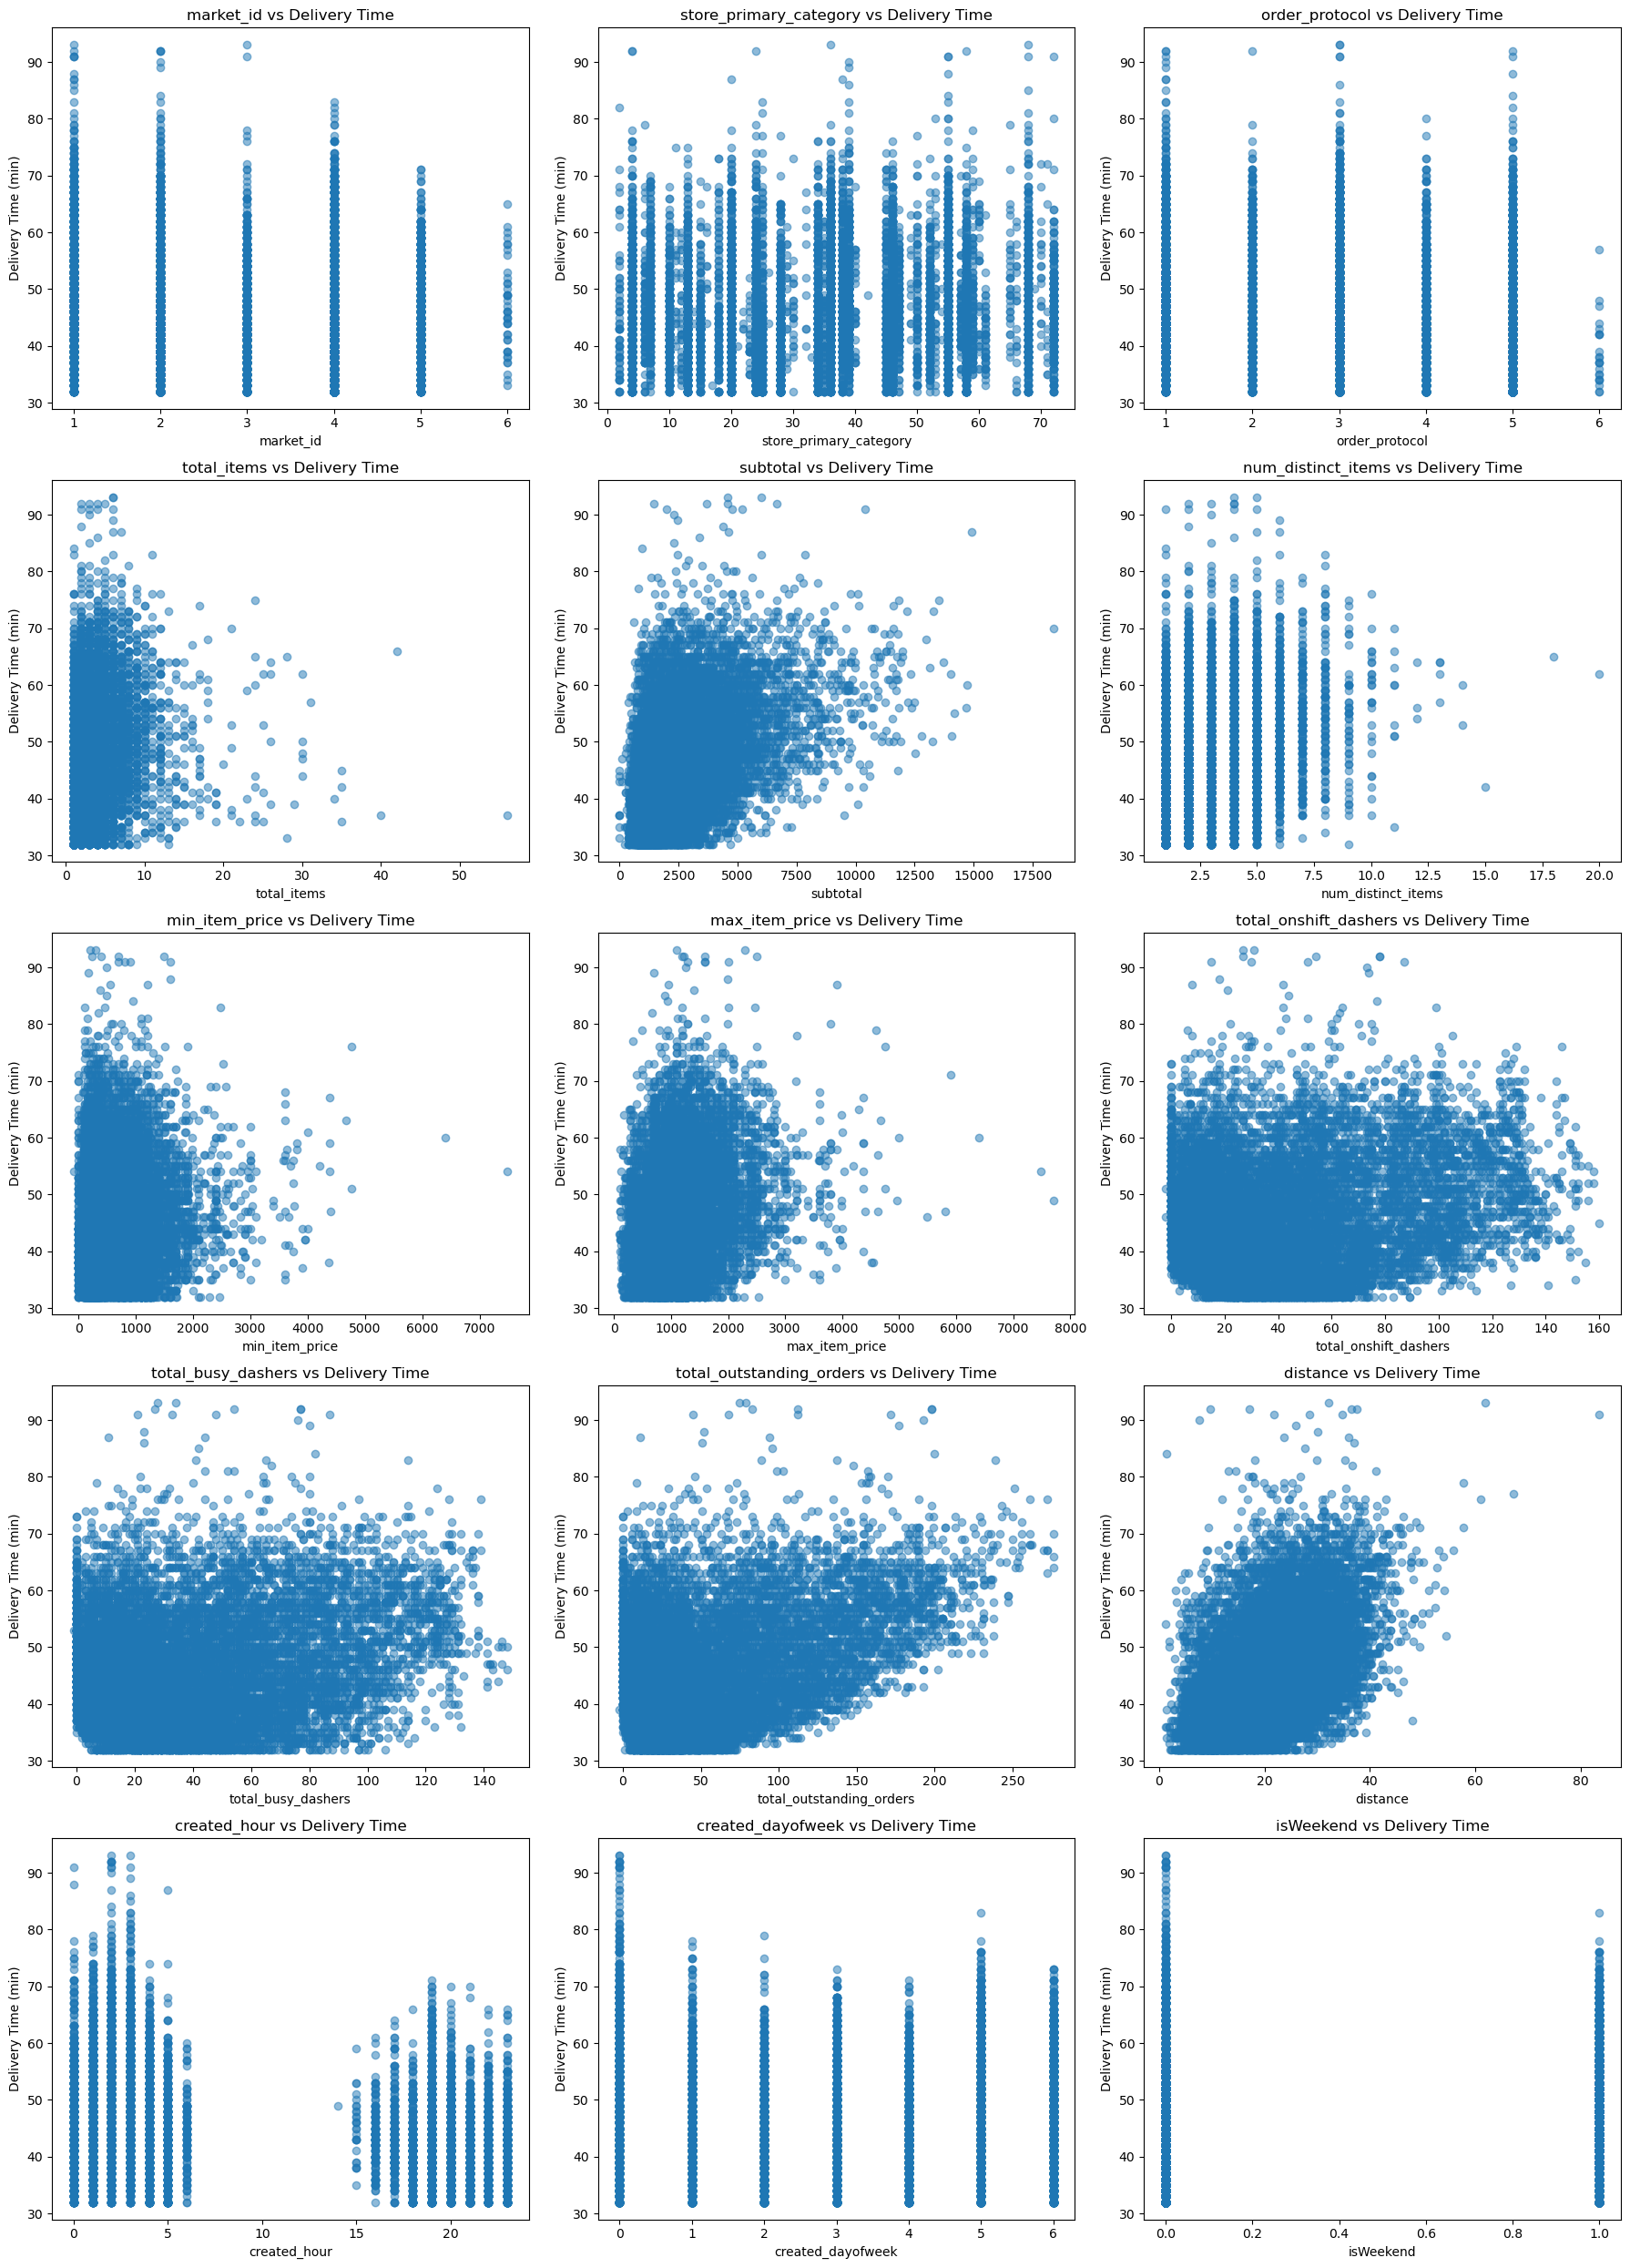

In [48]:
# Scatter plot to visualise the relationship between time_taken and other features
features_to_plot = X.columns[:]  

n_rows = (len(features_to_plot) + 2) // 3
plt.figure(figsize=(18, 5 * n_rows))

for i, feature in enumerate(features_to_plot):
    plt.subplot(n_rows, 3, i + 1)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.title(f'{feature} vs Delivery Time')
    plt.xlabel(feature)
    plt.ylabel('Delivery Time (min)')

plt.tight_layout()
plt.show()


In [ ]:
# Show the distribution of time_taken for different hours



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

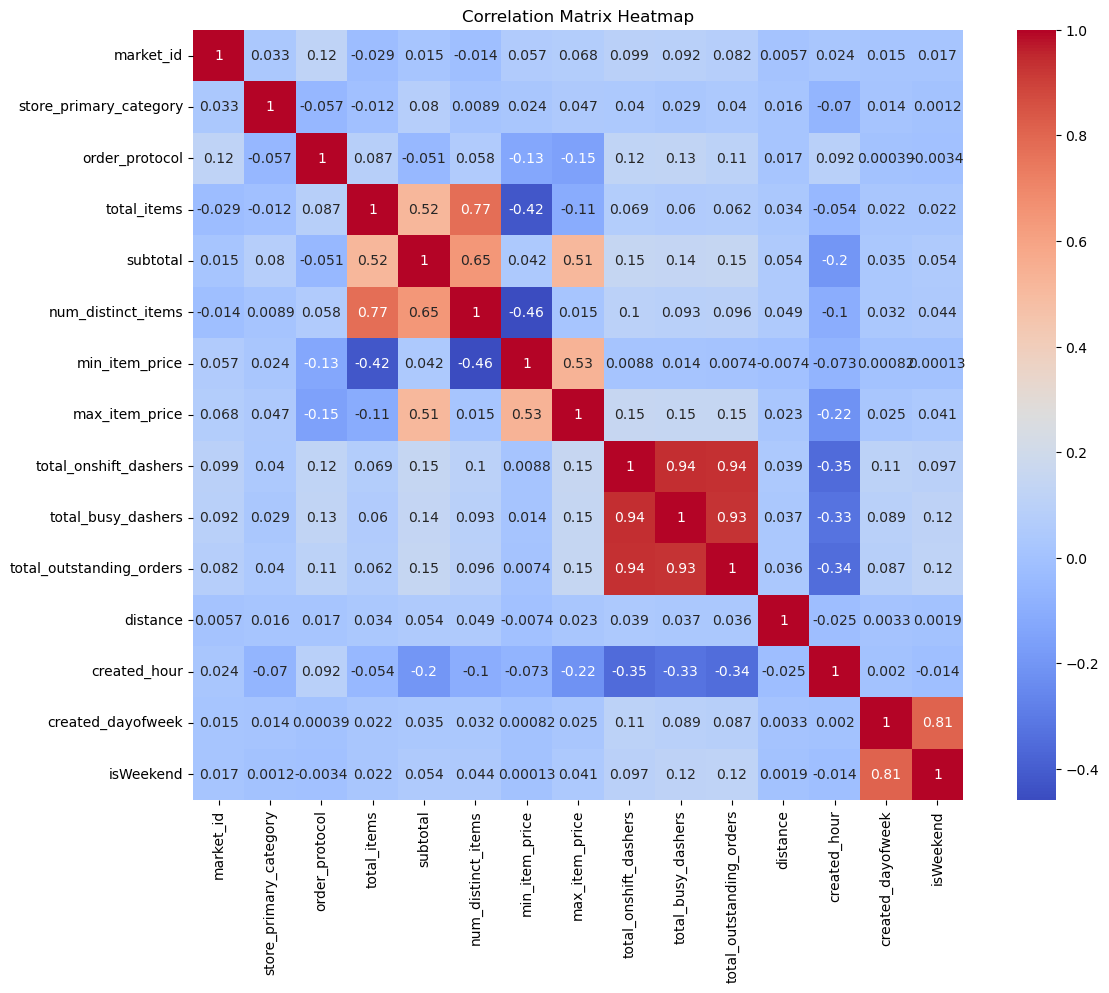

In [56]:
# Plot the heatmap of the correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [58]:
# Drop 3-5 weakly correlated columns from training dataset

correlations_with_target = X.copy()
correlations_with_target['time_taken'] = y
corr_matrix = correlations_with_target.corr()

# Get absolute correlation values for the target
target_corr = corr_matrix['time_taken'].drop('time_taken').abs()

# Find 3-5 features with the weakest correlation to drop
weak_features = target_corr.nsmallest(5).index.tolist()

# Drop weakly correlated features from X
X_reduced = X.drop(columns=weak_features)

# Show the dropped features and new shape of X
weak_features, X_reduced.shape

(['min_item_price',
  'created_dayofweek',
  'store_primary_category',
  'market_id',
  'isWeekend'],
 (11774, 10))

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [60]:
# Boxplot for time_taken
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['time_taken'])
plt.title('Boxplot of Delivery Time (Minutes)')
plt.ylabel('Delivery Time (Minutes)')
plt.grid(True)
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [62]:
# Handle outliers

Q1 = data['time_taken'].quantile(0.25)
Q3 = data['time_taken'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outlier values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers
data_no_outliers = data[
    (data['time_taken'] >= lower_bound) &
    (data['time_taken'] <= upper_bound)
]

# Show how many rows were removed
removed_rows = data.shape[0] - data_no_outliers.shape[0]
data_no_outliers.shape, removed_rows

((11634, 18), 140)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [66]:
# Import libraries
from sklearn.preprocessing import StandardScaler


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [68]:
# Apply scaling to the numerical columns
X_cleaned = data_no_outliers[[
    'store_primary_category', 'order_protocol', 'total_items',
    'subtotal', 'num_distinct_items', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers',
    'total_outstanding_orders', 'distance'
]]
y_cleaned = data_no_outliers['time_taken']

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Show shape of scaled features
X_scaled.shape


(11634, 10)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [70]:
# Create/Initialise the model
lr_model = LinearRegression()
lr_model

LinearRegression()

In [72]:
# Train the model using the training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=100)
lr_model.fit(X_train, y_train)


LinearRegression()

In [74]:
# Make predictions
y_pred = lr_model.predict(X_test)
y_pred[:5]


array([43.36377242, 34.0571132 , 38.95042458, 43.87603538, 44.12613924])

In [83]:
# Find results for evaluation metrics

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


{
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Error (MAE)': mae,
    'R-squared (R²)': r2
}

{'Mean Squared Error (MSE)': 13.091478104384471,
 'Root Mean Squared Error (RMSE)': 13.091478104384471,
 'Mean Absolute Error (MAE)': 2.8443332653073408,
 'R-squared (R²)': 0.8301082857206964}

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [99]:
# Loop through the number of features and test the model

import numpy as np

# Create a list to store evaluation results
evaluation_results = []

# Loop through number of features (1 to total features)
for i in range(1, X_cleaned.shape[1] + 1):
    # Select top i features
    selected_features = X_cleaned.columns[:i]
    X_subset = X_cleaned[selected_features]

    # Scale features
    X_scaled_subset = scaler.fit_transform(X_subset)

    # Split into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_subset, y_cleaned, test_size=0.2, random_state=42)

    # Train model
    lr_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = lr_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    evaluation_results.append((i, selected_features.tolist(), rmse, r2))

# Convert to DataFrame for display
results_df = pd.DataFrame(evaluation_results, columns=["Num_Features", "Features", "RMSE", "R_squared"])

results_df





Num_Features                                           Features       RMSE  \
0             1                           [store_primary_category]  73.316115   
1             2           [store_primary_category, order_protocol]  71.682910   
2             3  [store_primary_category, order_protocol, total...  68.130874   
3             4  [store_primary_category, order_protocol, total...  60.750265   
4             5  [store_primary_category, order_protocol, total...  60.379069   
5             6  [store_primary_category, order_protocol, total...  60.204626   
6             7  [store_primary_category, order_protocol, total...  59.364282   
7             8  [store_primary_category, order_protocol, total...  58.174885   
8             9  [store_primary_category, order_protocol, total...  28.755883   
9            10  [store_primary_category, order_protocol, total...  12.877467   

   R_squared  
0   0.003129  
1   0.025335  
2   0.073632  
3   0.173985  
4   0.179032  
5   0.181404  
6   0.192830  
7   0.209002  
8   0.609009  
9   0.824906

In [102]:
# Build the final model with selected number of features

optimal_num_features = 10
final_selected_features = X_cleaned.columns[:optimal_num_features]

# Prepare final training data
X_final = X_cleaned[final_selected_features]
X_final_scaled = scaler.fit_transform(X_final)

# Split into train/test sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final_scaled, y_cleaned, test_size=0.2, random_state=42)

# Train the final model
final_model = LinearRegression()
final_model.fit(X_train_final, y_train_final)

# Make predictions
y_final_pred = final_model.predict(X_test_final)

# Evaluate final model
final_rmse = mean_squared_error(y_test_final, y_final_pred)
final_mae = mean_absolute_error(y_test_final, y_final_pred)
final_r2 = r2_score(y_test_final, y_final_pred)

# Display evaluation metrics
{
    'Final RMSE': final_rmse,
    'Final MAE': final_mae,
    'Final R-squared (R²)': final_r2,
    'Used Features': final_selected_features.tolist()
}

{'Final RMSE': 12.8774669002289,
 'Final MAE': 2.7894311543112122,
 'Final R-squared (R²)': 0.8249064727097117,
 'Used Features': ['store_primary_category',
  'order_protocol',
  'total_items',
  'subtotal',
  'num_distinct_items',
  'max_item_price',
  'total_onshift_dashers',
  'total_busy_dashers',
  'total_outstanding_orders',
  'distance']}

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [104]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import scipy.stats as stats

# Calculate residuals
residuals = y_test_final - y_final_pred

# Set up plots
plt.figure(figsize=(18, 5))

# 1. Residuals vs. Predicted Values
plt.subplot(1, 3, 1)
plt.scatter(y_final_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

# 2. Q-Q Plot
plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# 3. Residuals Histogram
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [108]:
# Compare the scaled vs unscaled features used in the final model
X_final_unscaled = X_cleaned[final_selected_features]

# Create a DataFrame with scaled features for comparison
X_final_scaled_df = pd.DataFrame(X_final_scaled, columns=final_selected_features)

# Concatenate for side-by-side comparison (first 5 rows)
comparison_df = pd.concat([X_final_unscaled.reset_index(drop=True), X_final_scaled_df], axis=1)
comparison_df.columns = [f"{col}_unscaled" for col in final_selected_features] + [f"{col}_scaled" for col in final_selected_features]


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>  While these categorical variables alone don't have strong linear correlations with delivery time, they can still add predictive value when combined with other features in a multivariate model.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> Training data os 80% of the data and test data is 20%



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Distance has the highest correction on the time taken.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Interquartile Range (IQR) method is used on the target variable, first find Q1 and Q3, calculate IQR and then find lower and uper bound. Points below the lower bound and above the upeer bound are eliminated



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> total_outstanding_orders,   total_onshift_dashers  and total_busy_dashers



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residuals are the differences between the actual values and the predicted values. A residual plot is simply a graph that shows these residuals against the predicted values.